
<h1 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
</font>
</h1>
<h2 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  پروژه 2 یادگیری تقویتی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  نام: سحر آقاخانی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  شماره دانشجویی: -
</font>
</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.table as tbl


# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 1: تعریف محیط
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این کلاس با گرفتن یک ورودی که صفحه شطرنجی به شکل آرایه دو بعدی است، طول و عرض صفحه و مختصات شروع و هدف، حالت های بعدی  عامل پس از انجام هر عمل و همچنین پاداش ناشی از آن را محاسبه کرده و بر میگرداند.
این کلاس همچنین شامل یک متد به نام <code>get_next_state</code> است که با گرفتن ورودی عمل
  <code>'up','down','left','right'</code>
موقعیت بعدی عامل و همچنین پاداش ناشی از آن عمل را خروجی می دهد.همینطور این کلاس شامل یک متد به نام <code> is_terminal </code> است که به ازای هر موقعیت چک میکند که آیا در خانه پایانی هستیم یا خیر.

</font>
</p>

In [2]:

class GridWorld:
    def __init__(self, grid):
        self.grid = np.array(grid)
        self.height, self.width = self.grid.shape
        self.start = None
        self.goal = None

        for row in range(self.height):
            for col in range(self.width):
                if grid[row][col] == 'S':
                    self.start = (row, col)
                elif grid[row][col] == 'G':
                    self.goal = (row, col)

        if self.start is None:
            raise ValueError("Grid must contain a start position 'S'.")
        if self.goal is None:
            raise ValueError("Grid must contain a goal position 'G'.")


    def get_next_state(self, state , action):
        reward = 0
        if action == 'up':
            next_state = (state[0] - 1, state[1])
        elif action == 'down':
            next_state = (state[0] + 1, state[1])
        elif action == 'left':
            next_state = (state[0], state[1] - 1)
        elif action == 'right':
            next_state = (state[0], state[1] + 1)
        else:
            raise ValueError("Invalid action. Must be 'up', 'down', 'left', or 'right'.")

        #check if next state is out of grid
        if next_state[0] < 0 or next_state[0] > self.height-1 or next_state[1] < 0 or next_state[1] > self.width-1:
            next_state = state
            # reward = -1

        #check if next state is goal or hole
        if self.grid[next_state[0]][next_state[1]] == 'G':
          reward = 1
        elif self.grid[next_state[0]][next_state[1]] == 'H':
          # next_state = self.start
          reward = -1
        return next_state, reward

    def is_terminal(self, state):
      return self.grid[state[0]][state[1]] == 'G'



# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 2: تعریف عامل برای الگوریتم تکرار سیاست
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این پروژه عامل به صورت یک کلاس تعریف شده است که شامل آرایه هایی برای <code>value_function</code> و
<code>action_value</code> و
<code>policy</code>
است. در ابتدا مقدار تابع ارزش حالت و تابع ارزش حالت-عمل برای همه حالت ها صفر در نظر گرفته شده است. سپس با کمک الگوریتم های ارزیابی سیاست که در متد <code>policy_evaluation</code> پیاده سازی شده است و بهبود سیاست که در متد <code>policy_improvement</code> پیاده سازی شده است، مقدار دو تابع ارزش حالت و ارزش حالت عمل با کمک معادلات بلمن و همچنین سیاست بهینه با توجه به مقادیر این دو تابع به دست آمده است.
جزئیات کارکرد کد به صورت کامنت در کد مشخص است.

</font>
</p>

In [3]:
class Agent_policy_iteration:
  def __init__(self, grid, discount_factor):
    self.grid = grid
    self.discount_factor = discount_factor
    self.current_state = grid.start
    self.actions = ['up','down','left','right']
    self.value_function = np.zeros_like(grid.grid, dtype=float)
    self.policy =np.full((4, grid.height,grid.width),0.25, dtype=float)
    self.action_value = np.zeros_like(self.policy, dtype=float)

  def policy_evaluation(self, theta):

    while True:
      temp_value_fcn = np.zeros_like(self.value_function)
      #loop on height
      for i in range (self.grid.height):
        #loop on width
        for j in range (self.grid.width):
          # check if the point is terminal and assign value of 0
          if self.grid.is_terminal((i,j)):
            temp_value_fcn[i][j] = 0
          else:
            # belman equation for policy iteration
            current_value = self.value_function[i][j]
            next_value =0
            for num ,action in enumerate(self.actions):
              next_state, reward = self.grid.get_next_state((i,j), action)
              next_value += self.policy[num][i][j] * (reward + self.discount_factor * self.value_function[next_state[0]][next_state[1]])
              self.action_value[num,i,j] = (reward + self.discount_factor * self.value_function[next_state[0]][next_state[1]])
            temp_value_fcn[i][j] = next_value

      # check convergence and assign new value function
      if np.all(np.abs(self.value_function - temp_value_fcn) < theta):
        self.value_function = temp_value_fcn
        break
      self.value_function = temp_value_fcn


  def policy_improvement(self):
      prev_policy = self.policy.copy()
      # loop on height
      for i in range(self.grid.height):
        # loop on width
          for j in range(self.grid.width):
            # for each state (i,j) check if it is terminal if not find the maximum Q in each state
              if self.grid.is_terminal((i, j)):
                  self.policy[:, i, j] = np.nan
              else:
                  max_Q = np.max(self.action_value[:, i, j])
                  # check if there is more than one action with max Q and save to max_Q_indices
                  max_Q_indices= np.where(self.action_value[:,i,j] == max_Q)[0]

                  # divide the probabilitu between max action values
                  self.policy[:, i, j] = 0
                  for idx in max_Q_indices:
                      self.policy[idx, i, j] = 1 / len(max_Q_indices)

      return self.policy, prev_policy



  def policy_grid_drawer(self, input_policy):
    # this function is not necessary but since I encoded the actions as 'up' 'down'
    # and so on instead of numbers, I needed a way to again create a 2D grid
    # with list of optimal actions in each state instead of a 3D one with the
    # probability of each action.
      policy_grid = np.empty((self.grid.height, self.grid.width), dtype=object)

      for i in range(self.grid.height):
          for j in range(self.grid.width):
              if self.grid.is_terminal((i, j)):
                  continue
              else:
                  action_probabilities = input_policy[:, i, j]
                  max_prob = np.max(action_probabilities)
                  best_actions_indices = np.where(action_probabilities == max_prob)[0]

                  best_actions = [self.actions[idx] for idx in best_actions_indices]
                  policy_grid[i][j] = best_actions
      # print(f'this is : \n {policy_grid}')
      return policy_grid







# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 3: الگوریتم تکرار سیاست
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این تابع در حقیقت همان پیاده سازی الگوریتم تکرار سیاست است. ورودی های آن شامل یک لیست که مختصات خانه های یخ زده و دارای حفره و همچنین خانه شروع و خانه هدف را تعیین میکند است. همچنین ضریب تخفیف برای تعیین نزدیک بین یا دور بین بودن الگوریتم نیز اضافه شده است. با توجه به اینکه این احتمال وجود دارد که الگوریتم در چند بار اول همگرا نشود، حداکثر تعداد iteration های سیستم قبل از دادن ارور عدم همگرایی نیز توسط کاربر مشخص می شود.
احتمال دیگری که وجود دارد این است که سیاست بهینه به دست آمده در یک تکرار و تکرار بعدی یکسان باشد، اما این سیاست، سیاست بهینه نباشد، به همین خاطر تعداد دفعات متوالی که اگر سیاست  به دست آمده تغییری نکند، الگوریتم آن را به عنوان سیاست بهینه در نظر بگیرد نیز  توسط کاربر مشخص می شود. میزان تتا (متغیری که به وسیله آن همگرایی تابع ارزش حالت سنجیده می شود نیز میتواند توسط کاربر کنترل شود. دو متغیر <code> Draw_Table</code> و <code> Print_V</code> نیز تعیین میکنند که آیا جدول سیسات بهینه و جدول تابع ارزش بر روی گرید رسم بشود  یا خیر.
</font>
</p>

In [4]:
def Policy_Iteration(grid,discount_factor=0.9, max_iterations=100, optim_count =5 , theta=0.0001 , Draw_Table = True, Print_V =False):
  Grid = GridWorld(grid)
  agent = Agent_policy_iteration(Grid,discount_factor)
  loop_count_debug =0
  counter = 0
  while True:
    agent.policy_evaluation(theta)
    next_policy, policy = agent.policy_improvement()
    #print(counter)
    if np.array_equal(agent.policy_grid_drawer(next_policy), agent.policy_grid_drawer(policy)):
     loop_count_debug +=1
     if loop_count_debug> optim_count:
      #print(counter+1)
      break
    else:
      loop_count_debug = 0
    if counter > max_iterations:
      raise ValueError(f"Policy iteration did not converge after {max_iterations} iterations")
      break
    counter +=1
  # print(agent.policy)
  if Draw_Table == True:
    draw_policy_table(Grid,agent.policy_grid_drawer(agent.policy) )
  if Print_V ==True:
    value_function = agent.value_function
    draw_value_table(Grid,value_function)
    #print(agent.value_function)

  # return agent.policy_grid_drawer(agent.policy)




# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 4: الگوریتم تکرار ارزش
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این الگوریتم، ابتدا تابع ارزش بهینه به وسیله فرمول بلمن محاسبه می‌شود. پس از محاسبه تابع ارزش بهینه، تابع ارزش حالت-عمل بهینه نیز محاسبه شده و از روی آن فقط با یک بار محاسبه، سیاست بهینه به دست می آید. بدین منظور، یک کلاس به نام <code> AgentValueIteration</code> تعریف شده که صفحه مساله و فاکتور تخفیف را به عنوان ورودی دریافت میکند. این کلاس شامل متد <code> find_optimal_value_fcn</code> است که در حداکثر 100.000 تکرار تلاش میکند تا تابع ارزش بهینه را پیدا کند. اگر همگرا نشود، ارور میدهد. همچنین فاکتور همگرایی به طور پیش فرض 0.0001 در نظر گرفته شده است. این تابع به کمک فرمول بلمن برای حداکثر ارزش حالت ها، ارزش حالت بهینه را به دست می آورد. پس از آن ارزش حالت عمل مربوط به تابع فعلی محاسبه می شود. در نهایت سیاست بهینه از روی یافتن عمل هایی که ارزش حالت عمل آن ها بیشینه است پیدا می شود.

</font>
</p>

In [5]:
class AgentValueIteration:
    def __init__(self, grid, discount_factor=0.9):
        self.grid = grid
        self.discount_factor = discount_factor
        self.actions = ['up', 'down', 'left', 'right']
        self.value_function = np.zeros_like(grid.grid, dtype=float)
        self.policy = np.empty((4,self.grid.height, self.grid.width), dtype=object)
        self.action_value = np.zeros((4,self.grid.height, self.grid.width), dtype=float)

    def find_optimal_value_fcn(self, theta=0.0001 , max_value_iterations = 100000):
      for iteration in range(max_value_iterations):
        temp_value_fcn = np.zeros_like(self.value_function)
        for i in range(self.grid.height):
          for j in range(self.grid.width):
            if self.grid.is_terminal((i, j)):
              continue
            action_values = []
            for k in self.actions:
              next_state, reward = self.grid.get_next_state((i,j), k)
              action_values.append(reward + self.discount_factor*self.value_function[next_state[0], next_state[1]])
            temp_value_fcn[i,j] = max(action_values)

        if (np.max(abs(temp_value_fcn - self.value_function))<theta):
          self.value_function = temp_value_fcn

          break

        self.value_function = temp_value_fcn
        if iteration==max_value_iterations -1:
          raise ValueError(f"Policy iteration did not converge after {max_value_iterations} iterations")

      #find action values
      # loop on height
      for i in range(self.grid.height):
        # loop on width
          for j in range(self.grid.width):
            #loop on actions
            for k,action in enumerate(self.actions):
              next_state, reward = self.grid.get_next_state((i,j), action)
              self.action_value[k,i,j] = (reward + self.discount_factor * self.value_function[next_state[0]][next_state[1]])




    def find_best_policy(self):
      # loop on height
      for i in range(self.grid.height):
        # loop on width
          for j in range(self.grid.width):
            # for each state (i,j) check if it is terminal if not find the maximum Q in each state
              if self.grid.is_terminal((i, j)):
                  self.policy[:, i, j] = np.nan
              else:
                  max_Q = np.max(self.action_value[:, i, j])
                  # check if there is more than one action with max Q and save to max_Q_indices
                  max_Q_indices= np.where(self.action_value[:,i,j] == max_Q)[0]

                  # divide the probabilitu between max action values
                  self.policy[:, i, j] = 0
                  for idx in max_Q_indices:
                      self.policy[idx, i, j] = 1 / len(max_Q_indices)

      return self.policy


    def policy_grid_drawer(self, input_policy):
      # this function is not necessary but since I encoded the actions as 'up' 'down'
      # and so on instead of numbers, I needed a way to again create a 2D grid
      # with list of optimal actions in each state instead of a 3D one with the
      # probability of each action.
        policy_grid = np.empty((self.grid.height, self.grid.width), dtype=object)

        for i in range(self.grid.height):
            for j in range(self.grid.width):
                if self.grid.is_terminal((i, j)):
                    continue
                else:
                    action_probabilities = input_policy[:, i, j]
                    max_prob = np.max(action_probabilities)
                    best_actions_indices = np.where(action_probabilities == max_prob)[0]

                    best_actions = [self.actions[idx] for idx in best_actions_indices]
                    policy_grid[i][j] = best_actions
        # print(f'this is : \n {policy_grid}')
        return policy_grid



# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 5: الگوریتم تکرار ارزش
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این تابع جهت پیاده سازی الگوریتم تکرار ارزش در یک خط نوشته شده است.
</font>
</p>

In [6]:
def Value_Iteration(grid, discount_factor=0.9, theta=0.0001, Draw_Policy= True,Draw_Value = False):
  grid = GridWorld(grid)
  agent = AgentValueIteration(grid)
  agent.find_optimal_value_fcn()
  agent.find_best_policy()
  if Draw_Policy ==True:
    draw_policy_table(grid, agent.policy_grid_drawer(agent.policy))
  if Draw_Value == True:
    draw_value_table(grid, agent.value_function)


# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 6: رسم نمودارهای سیاست بهینه و تابع ارزش نهایی
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این دو تابع نمودارهای تابع ارزش و همچنین نمودار سیاست بهینه را رسم میکنند.

</font>
</p>

In [7]:

def draw_policy_table(grid, best_policy):

    action_symbols = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
    fig, ax = plt.subplots(figsize=(grid.width, grid.height))
    ax.axis('off')
    table = tbl.Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = grid.height, grid.width
    width, height = 1.0 / ncols, 1.0 / nrows

    for i in range(nrows):
        for j in range(ncols):
            state = grid.grid[i][j]
            if state == 'H':
                optimal_actions = best_policy[i][j]
                cell_text = 'H'+''.join(action_symbols[action] for action in optimal_actions)
                cell_color = 'lightgray'
            elif state == 'G':
                cell_text = 'G'
                cell_color = 'lightgreen'
            elif state == 'S':
                optimal_actions = best_policy[i][j]
                cell_text = 'S'+''.join(action_symbols[action] for action in optimal_actions)
                cell_color = 'pink'
            else:
                optimal_actions = best_policy[i][j]
                cell_text = ''.join(action_symbols[action] for action in optimal_actions)
                cell_color = 'white'

            table.add_cell(i, j, width, height, text=cell_text, loc='center', facecolor=cell_color)


    for i in range(nrows):
        table.add_cell(i, -1, width, height, text=i, loc='right', edgecolor='none', facecolor='none')
    for j in range(ncols):
        table.add_cell(-1, j, width, height/2, text=j, loc='center', edgecolor='none', facecolor='none')

    ax.add_table(table)
    plt.show()




In [8]:
def draw_value_table(grid, value_function):

    fig, ax = plt.subplots(figsize=(grid.width, grid.height))
    ax.axis('off')
    table = tbl.Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = grid.height, grid.width
    width, height = 1.0 / ncols, 1.0 / nrows

    for i in range(nrows):
        for j in range(ncols):
            state = grid.grid[i][j]
            value = value_function[i][j]
            if state == 'H':
                cell_text = f'{ value:.4f}'
                cell_color = 'lightgray'
            elif state == 'G':
                cell_text = 'G' +'\n'+f'{value:.4f}'
                cell_color = 'lightgreen'
            elif state == 'S':
                cell_text = 'S'+'\n'+f'{value:.4f}'
                cell_color = 'pink'
            else:
                cell_text = f'{value:.4f}'
                cell_color = 'white'

            table.add_cell(i, j, width, height, text=cell_text, loc='center', facecolor=cell_color)


    for i in range(nrows):
        table.add_cell(i, -1, width, height, text=i, loc='right', edgecolor='none', facecolor='none')
    for j in range(ncols):
        table.add_cell(-1, j, width, height/2, text=j, loc='center', edgecolor='none', facecolor='none')

    ax.add_table(table)
    plt.show()


# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 7: پاسخ سوال
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سلول اول این بخش، پاسخ سوال به روش تکرار ارزش و در سلول دوم پاسخ به روش تکرار سیاست آورده شده است. واضح است که سیاست نهایی این دو روش با هم برابر هستند.


</font>
</p>

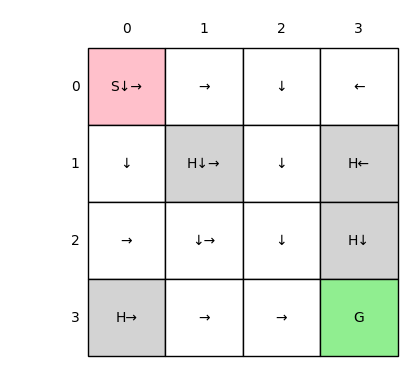

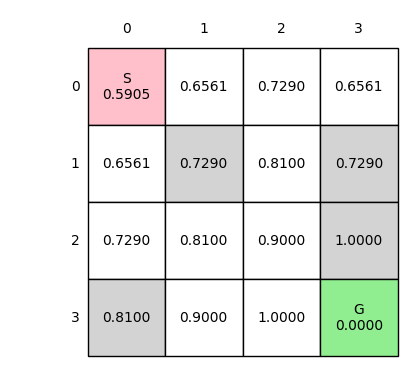

In [9]:
grid= [['S','F','F','F'],['F','H','F','H'],['F','F','F','H'],['H','F','F','G']]
Value_Iteration(grid,Draw_Value = True)

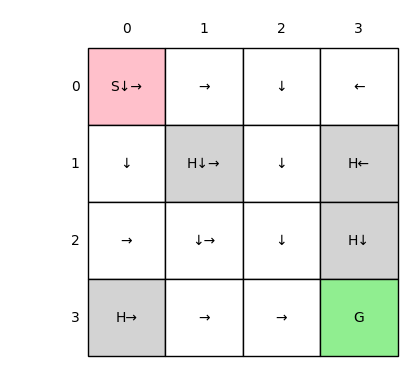

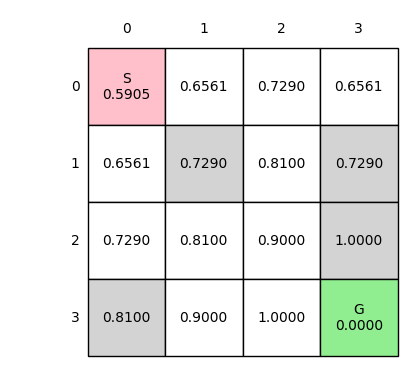

In [10]:
grid= [['S','F','F','F'],['F','H','F','H'],['F','F','F','H'],['H','F','F','G']]
Policy_Iteration(grid,Print_V =True)

# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 8: پیاده سازی الگوریتم برای سیستم های مشابه دیگر با ابعاد متفاوت
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش تابع سیاست بهینه برای چند محیط دیگر نیز به دست آمده است.
</font>
</p>

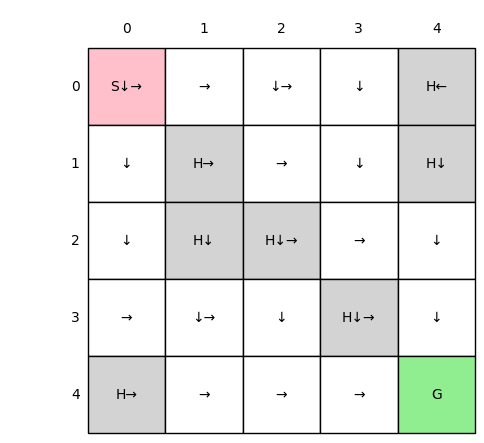

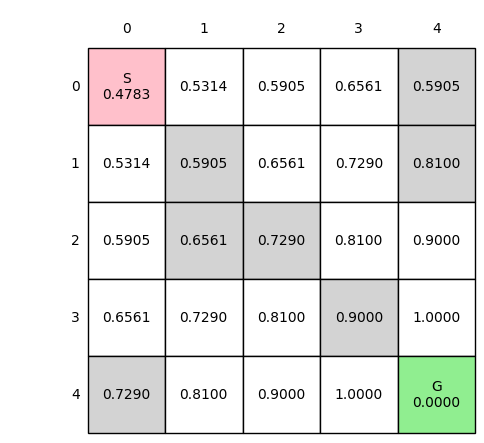

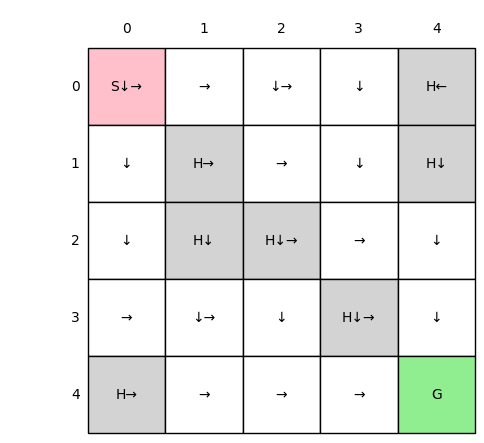

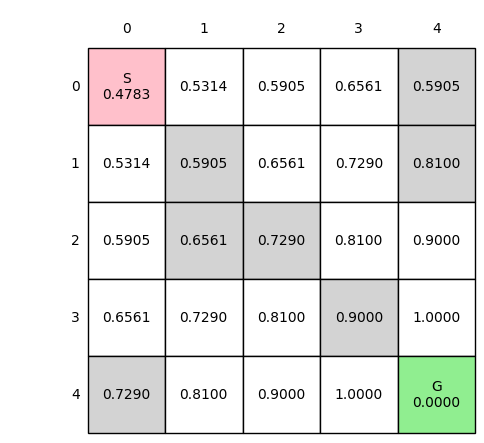

In [11]:
grid1= [['S','F','F','F','H'],['F','H','F','F','H'],['F','H','H','F','F'],['F','F','F','H','F'], ['H','F','F','F','G']]
Policy_Iteration(grid1,Print_V =True)
Value_Iteration(grid1,Draw_Value = True)

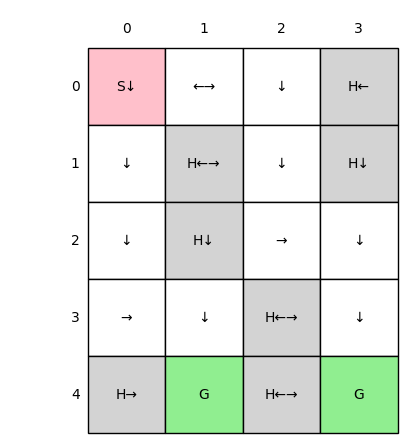

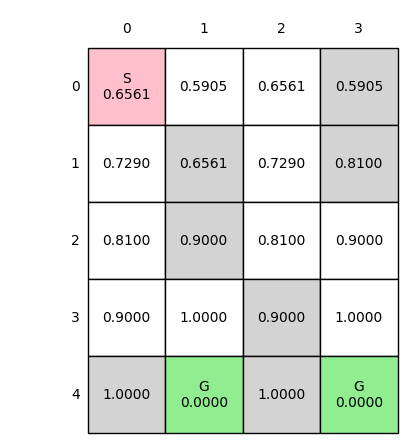

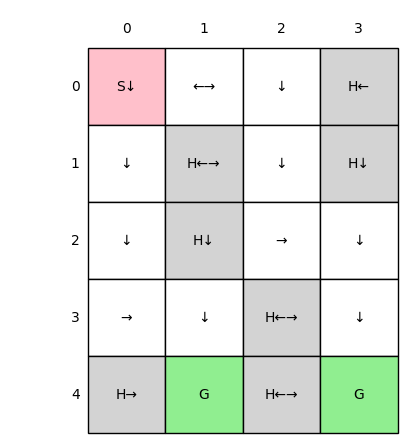

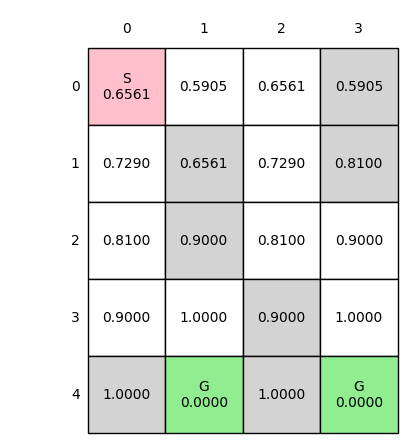

In [12]:
grid2= [['S','F','F','H'],['F','H','F','H'],['F','H','F','F'],['F','F','H','F'], ['H','G','H','G']]
Policy_Iteration(grid2,Print_V =True)
Value_Iteration(grid2,Draw_Value = True)

# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 9: مقایسه سرعت الگوریتم تکرار ارزش و تکرار سیاست
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش ابتدا یک محیط با خانه های حاوی حفره رندوم با ابعاد مشخص توسط تابع <code> create_random_grid</code> ساخته شده به نحوی که نقطه شروع در حانه بالا و چپ و نقطه هدف در خانه پایین و راست باشد. سیاست بهینه این مساله به هر دو روش تکرار سیاست و تکرار ارزش محاسبه شده است. همانطور که مشخص است، تکرار ارزش برای محیط 15*15 حدود 0.06 ثانیه و تکرار سیاست برای همان محیط 1.3 ثانیه طول میکشد که نشان دهنده این است که تکرار ارزش روش بهینه تری برای انجام محاسبات است.
</font>
</p>

In [13]:
import numpy as np
import time
def create_random_grid(n, b, theta=0.1):
  # creates a random n*b grid with one start at top left and goal at bottom right
  # and 0<theta<1 is the possibility of an element being 'H'
  low = 0
  high = 1

  random_array = np.random.uniform(low, high, (n, b))
  grid = np.full((n, b), 'F', dtype=object)
  grid[random_array <= theta] = 'H'
  grid[0, 0] = 'S'
  grid[n-1, b-1] = 'G'
  return grid


In [15]:
grid = create_random_grid(15, 15, theta=0.1)

# Time Policy_Iteration
start_time_policy = time.time()
Policy_Iteration(grid, Draw_Table=False)
policy_iteration_time = time.time() - start_time_policy
print(f"Policy_Iteration took {policy_iteration_time:.6f} seconds")

# Time Value_Iteration
start_time_value = time.time()
Value_Iteration(grid, Draw_Policy = False)
value_iteration_time = time.time() - start_time_value
print(f"Value_Iteration took {value_iteration_time:.6f} seconds")

Policy_Iteration took 1.288649 seconds
Value_Iteration took 0.061989 seconds
